In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Question 11
    (Intermediate) (Bridging Question)
    Topics Covered: Marginal Probability
    An automobile vendor wants to analyze the cars sold in the past month to further improve its Sales. As a first step, the vendor 
    wants to find the carbody type (hatchback, sedan, etc.) which was sold the maximum and its pobability amongst all cars sold.

In [3]:
df = pd.read_csv('Cars.csv')
df.head()

,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Find the carbody type which was sold the maximum. Calculate the probability of selling that carbody type amongst all the cars sold.

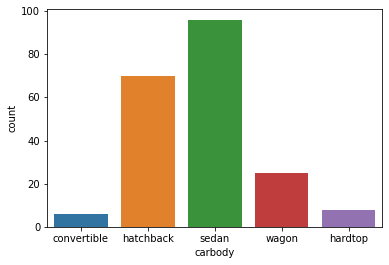

In [4]:
sns.countplot(df['carbody'])
plt.show()

> Sedan was sold most

In [5]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [6]:
total = df['carbody'].value_counts().sum()

In [7]:
p_sedan = 96/total
print(f'Probability of selling sedan is {np.round(p_sedan,3)}')

Probability of selling sedan is 0.468


### Question 12 -
    (Intermediate)
    Topics Covered: Joint Probability (Percentage)
    An automobile vendor wants to analyze the cars sold in the past month to further improve its Sales. 
    It has been observed that cars with carbody type as sedan were sold the maximum.
    Out of theses sedan type cars, the vendor wants to know how many were using fueltype as gas

In [14]:
pd.crosstab( df['fueltype'], df['carbody'],normalize=False)

carbody,convertible,hardtop,hatchback,sedan,wagon
fueltype,,,,,
diesel,0,1,1,15,3
gas,6,7,69,81,22


> ### 86 cars where fueltype as gas 

### Calculate the percentage of cars sold having fueltype as gas and sedan as its carbody type

In [26]:
join_prob = p_sedan * (185/205)
join_prob

0.4226055919095777

In [28]:
df[(df['carbody'] == 'sedan') & (df['fueltype'] == 'gas')]['carname'].count()

81

### An automobile vendor wants to analyze the cars sold in the past month to further improve its Sales.
    Given that the aspiration type is standard (std), what is the probability that the car sold is a four door car (doornumber)?

In [32]:
p_aspiration = (df['aspiration'] == 'std').sum()/df.shape[0]
p_aspiration

0.8195121951219512

In [40]:
p_aspiration_4_door = ((df['aspiration'] == 'std') & (df['doornumber'] == 'four')).sum()/df.shape[0]
p_aspiration_4_door

0.45365853658536587

In [44]:
p_doornumber_aspiration = round(p_aspiration_4_door/p_aspiration,3)
p_doornumber_aspiration

0.554

### Question 14 - Probability Distribution
    (Intermediate)
    Topics Covered:
    Probability Distribution - Bernoulli
    Expected Value & Variance of Bernoulli Distribution
    Democratic Party has been in power since past decade in the state of XYZ. In the upcoming Electoral Poll, the chances of 
    Democratic Party winning are 80% against the only other party, Republican.
    Consider a random variable X that represents the winning of Democratic party.
    1. Plot the probability distribution of X by generating 10000 randon numbers.
    2. Calculate X's expected value and variance.
    The only possible outcomes in this case are two, Win or Lose, the distribution of winning probability can be 
    represented using Bernoulli's Distribution

<AxesSubplot:xlabel='Bernoulli Distribution', ylabel='Frequency'>

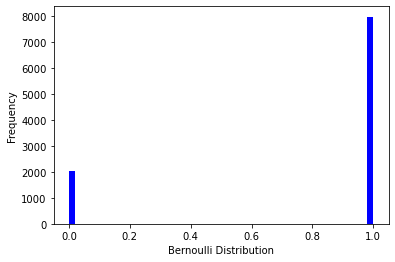

In [45]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=10000, p=0.8)
ax = sns.distplot(data_bern, kde=False, color='blue', 
                  hist_kws = {'linewidth':15, 'alpha': 1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')
ax

In [46]:
#Finding the bernouilis distribution when x=0 and x=1 with p=0.8
print(bernoulli.pmf(0,0.8))
print(bernoulli.pmf(1,0.8))

0.19999999999999998
0.8


In [47]:
# Finding the mean and variance
p=0.8
print(bernoulli.mean(p, loc=0))
print(bernoulli.var(p, loc=0))


0.8
0.15999999999999998


### Question 15 - Sample Mean
    (Intermediate)
    Topics Covered:
    Generating random samples
    Sample Mean
    Mean of Sample Means
    Before starting a Weight Loss program, AppyFit Fitness Institute, wants to analyze the performance of the
    program using some random data.
    It wants to calculate mean loss in weight that can be achieved in a batch. A batch of program consists of 50
    participants. It is known from past programs, that the range of weight loss achieved is between 5 kgs to 25 kg.
    To help this institute, perform random experiment as described below:
    1. Generate random samples of size 50 in the above given range
    2. Calculate mean weight loss of these 50 data points
    3. Simulate this 1000 times
    4. Calculate mean of sample means

In [50]:
samples = np.random.randint(5,25,50)
samples

array([13,  6, 18, 24, 11, 23, 18, 20, 16, 18, 16, 14, 17, 12,  5, 18, 23,
       13, 16,  7, 11,  5, 18, 14,  6, 11, 19, 15,  5, 14,  6, 23, 20,  7,
       23, 24,  7, 18,  6,  5,  9, 13, 11,  6, 10, 22, 18,  7, 12, 18])

In [51]:
print(f"Mean: ",np.mean(samples))

Mean:  13.82


In [52]:
mean_list = []
for i in range(1,1001):
    mean_list.append(np.mean(np.random.randint(5,25,50)))
print(f'Simulated Mean: {np.mean(mean_list)}')

Simulated Mean: 14.483059999999998


### Question 16 - Probability Analysis on Covid-19 Data
    (Advanced) (Bridging Question)
    Topics Covered:
    Types of Probabilities: Marginal & Conditional Rules of Probability
    Types of Events: Independent & Dependent
    The world saw an outbreak of a pandemic in the year 2020, COVID-19. A large amount and variety of data is available to 
    perform research on this data.
    The first step of a Data Science process is performing stattistics on the given data. Thus, start with the process of 
    calculating various probabilities as described below. 
    These will help in analyzing the outbreak based on factors such as Age, Gender, etc.

In [54]:
df = pd.read_csv('covid19_patient_info.csv', index_col='patient_id')
df.head()

,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
patient_id,,,,,,,,,,,,,,,,,
1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


    1. Calculate the probability that a patient is *male*
    2. Determine the gender which has the higher probability for the specified value of
    age. Take *age* as input from user

In [60]:
p_male = (df['sex'] == 'male').sum()/df.shape[0]
print(f"probability that a patient is male is: {np.round(p_male,3)}")

probability that a patient is male is: 0.413


In [62]:
gender_age_df = pd.crosstab(df['sex'], df['age'], normalize=False)
gender_age_df

age,0s,100s,10s,20s,30,30s,40s,50s,60s,70s,80s,90s
sex,,,,,,,,,,,,
female,26,1,64,442,1,234,290,376,236,129,110,31
male,34,0,96,417,0,259,193,249,187,81,52,16


In [71]:
age = 40
p_age = gender_age_df[gender_age_df.loc[:, str(age)+"s"] == gender_age_df.loc[:, str(age)+"s"].max()].index[0]
p_age

'female'

### Question 17 - Probability Distribution - Uniform
    (Advanced)
    Topics Covered:
    Probability Distribution: Uniform Mean & Variance from distribution Probability from distribution
    The thickness x of a protective coating applied to a conducting metal follows a uniform distribution over the interval [22, 42] 
    microns. Find the mean, variance and also the probability that the coating is less than 35 microns thick. Also, plot the 
    Uniform Distribution graph for 100 random variables with above specifications

In [ ]:
from scipy.stats import uniform
uniform.rvs()

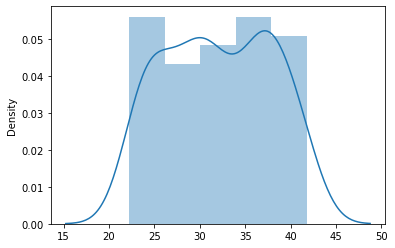

In [81]:
variables = np.random.uniform(22,42,100)
sns.distplot(variables)
plt.show()

In [82]:
print(f"Mean: {np.mean(variables)}, Var: {np.var(variables)}")

Mean: 32.02360015358996, Var: 33.726272942670896


In [83]:
p_less_than_35 = (variables < 35).sum()/len(variables)
p_less_than_35

0.61

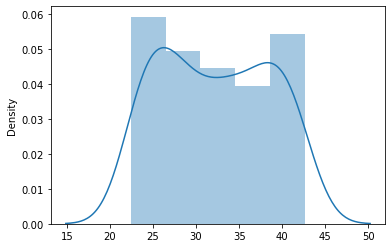

Mean: 32.21161596118832, Var: 39.24070556287794


0.63

In [90]:
from scipy.stats import uniform
variables = uniform.rvs(size=100, loc=22, scale=21)
sns.distplot(variables)
plt.show()
print(f"Mean: {np.mean(variables)}, Var: {np.var(variables)}")
p_less_than_35 = (variables < 35).sum()/len(variables)
p_less_than_35

In [94]:
uniform.cdf(35, loc=22, scale=21)

0.6190476190476191

In [95]:
print("Mean: ", uniform.mean(loc=20,scale=39))
print("Variance: ", uniform.var(loc=20,scale=39))

Mean:  39.5
Variance:  126.75


### Question 18 - Probability Analysis on Students Data
    (Advanced) (Bridging Question)
    Topics Covered:
    Nornal Distribution
    Probability of a range of values (CDF)
    For a health inspection in a university, heights of students need to be analyzed. Students' data containing details
    such as age, height, weight, scores etc. is provided for the same. The data is available at
    https://www.dropbox.com/s/noh3lk3lrh4k2va/students.csv?dl=0
    (https://www.dropbox.com/s/noh3lk3lrh4k2va/students.csv?dl=0) in a table named students.csv The attributes
    names are self-explanatory such as: stud.id, name, gender, age, height, weight, religion, nc.score, semester,
    major, minor, score1, score2, online.tutorial, graduated, salary.
    In this question, we will analyze the height variable

In [97]:
df = pd.read_csv('students.csv', index_col=[0])
df.head()

,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
stud.id,,,,,,,,,,,,,,,
833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


1. Plot the distribution of values of column *height* and observe that it follows n
ormal distribution
2. Calculate the mean & standard deviation of heights
3. Calculate the probability that the height is greater that 180 cm and less than 1
90 cm

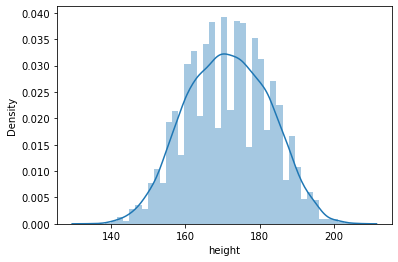

In [98]:
sns.distplot(df['height'])
plt.show()

In [101]:
df['height'].agg(['mean','var','std'])

mean    171.380750
var     122.711652
std      11.077529
Name: height, dtype: float64

In [103]:
p_180_190 = ((df['height'] > 180) & (df['height'] < 190)).sum()/df.shape[0]
p_180_190

0.1752639883481005

In [106]:
uniform.cdf(190, loc=140, scale=60) - uniform.cdf(180, loc=140, scale=60)

0.16666666666666674

### Question 19 - Poker Prediction
(Advanced)
Topics Covered:
Bayes' Theorem
In Casino is analyzing the games of Poker played there in order to build an algorithm that can defeat the best of
players.

- Probability that a player is lying = 0.75
- Probability that a player is not lying = 0.25
- Probability that a player wins when he lied = 0.43
- Probability that a player wins when he did not lie = 0.57
Calculate the probability that a player was lying given that he has won the game

In [109]:
p_A1 = 0.75
p_A2 = 0.25
p_B_A1 = 0.43
p_B_A2 = 0.57

# p(A1/B) = (p(B/A1)*p(A1))/((p(B/A1)*p(A1)) + (p(B/A2)*p(A2)))

prob = np.round((0.43*0.75)/((0.43*0.75)+(0.57*0.25)),3)
prob

0.694

### Question 20 - Geometric Distribution
    (Advanced)
    Terminals on an on-line computer system are attached to a communication line on the central computer system.
    The probability that any terminal is ready to transmit is 0.03.
    1.Find the probability that 8 terminals are polled until the first ready terminal is located.
    2.Find the mean & variance 
    Hint: Use Geometric Distribution. Generate 10000 random samples following the
    above specification.

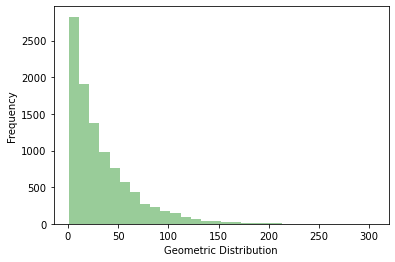

In [114]:
from scipy.stats import geom
data = geom.rvs(p=0.03, size=10000)

sns.distplot(data, bins=30, kde=False, color='green')
plt.ylabel('Frequency')
plt.xlabel('Geometric Distribution')
plt.show()

In [115]:
prob = np.round(geom.pmf(8, 0.03, loc=0),3)
prob

0.024

In [116]:
geom.mean(0.03, loc=0),geom.var(0.03, loc=0)

(33.333333333333336, 1077.7777777777778)